Q1: How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.


ANSWER: Let A be our (n,k) matrix and B be our (k,m) matrix and suppose A and B multiply to give C such that C=A*"B .so our C will be (n,m) matrix. To get any element C[i][j] we have to multiply ith row of A and jth column of B. As here there are k elements in any row and column of A and B respectively. therefore to compute one element of C we have to do k multipications and k-1 additions. As there are total n*"m elements in C so total number of multiplication required is n.m.k and total number of addition required is n.m.k-1 .

Q2: Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [4]:
A=[[1,2,3],[4,5,6]]
B=[[1,2,3,4],[5,6,7,8],[9,0,1,2]]
# here n=2,k=3,m=4

In [5]:
import time
start_time=time.time()
n=len(A)
k=len(B)
m=len(B[0])
C=[[0]*m for _ in range(n)]
for i in range(n):
    for j in range(m):
        for a in range(k):
            C[i][j]+=A[i][a]*B[a][j]           
end_time=time.time()
time_using_list=end_time-start_time
print("time taken for multiply using list is", time_using_list)
            
    

time taken for multiply using list is 0.000997781753540039


In [6]:
import numpy as np
start_time=time.time()
A=np.array([[1,2,3],[4,5,6]])
B=np.array([[1,2,3,4],[5,6,7,8],[9,0,1,2]])
start_time=time.time()
C=A@B
end_time=time.time()
time_using_numpy=end_time-start_time
print("time taken for multiply using numpy is", time_using_numpy)

time taken for multiply using numpy is 0.0


numpy is faster because here algorithms are written in c language.

Q3: Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

TIME COMPLEXITY:
As finding maximum element in list require 1 pass of array so if n is number of element in list then its median will be n//2(if n is odd) element of array, average of n/2 and n/2-1 (if n is even). so if we let our median be at k, then it requires k-1 passes of array. so time complexity will be T(n)=n+n-1+........n-k = n(k+1)-(k(k+1))/2
in our case k is approx n/2 so put in equation T(n)=n(n/2+1)-(n/2(n/2+1))/2
T(n)=n^2/2 + n -n^2/8 - n/4 = 3n^2/8 + 3n/4
which is approximately O(n^2)
better meathod to find median of an array can be quickselect. In this we take one pivot element and partition the array into 2 parts such that number less than pivot element is on one side and greater than on other. so we get new position of our pivot element. If pivot index matches the index required for our median position then we get our solution otherwise you hve to call the function again.  

In [19]:
# 1st meathod
def med1(arr):
    def k_smallest(k,arr):
        copy = arr.copy()
        for i in range(k+1):
            smallest = float('inf')
            for num in copy:
                if num < smallest:
                    smallest = num
            copy.remove(smallest)
        return smallest
    n=len(arr)
    if n%2==1:
        med=k_smallest(n//2,arr)
    else:
        med=(k_smallest(n/2,arr)+k_smallest((n/2)-1,arr))/2
    return med    


In [31]:
# quickselect meathod
def med2 (arr):
    def par(small,large,arr):
        pvt=arr[large]
        i=small-1
        for j in range(small,large):
            if arr[j]<=pvt:
                i+=1
                arr[i],arr[j]=arr[j],arr[i]
        arr[i+1],arr[large]=arr[large],arr[i+1]
        return i+1
    def quick(small,large,k,arr):
        if small==large:
            return arr[small]
        pi= par(small,large,arr)
        if pi==k:
            return arr[k]
        elif pi<k:
            quick(pi+1,large,k,arr)
        else:
            quick(small,pi-1,k,arr)
    n=len(arr)
    if n%2==1:
        med=quick(0,n-1,n//2,arr)
    else:
        med=(quick(0,n-1,n//2,arr)+quick(0,n-1,(n//2)-1,arr))/2
    return med


94


In [33]:
# for comparison
arr=[214,45,874,65,2,8792,94]
start_time=time.time()
print(med1(arr))
end_time=time.time()
time_using_med1=end_time-start_time
print("time taken for median using med1 is", time_using_med1)

start_time=time.time()
print(med2(arr))
end_time=time.time()
time_using_med2=end_time-start_time
print("time taken for median using med2 is", time_using_med2)

start_time=time.time()
print(np.median(arr))
end_time=time.time()
time_using_np=end_time-start_time
print("time taken for median using numpy is", time_using_np)


94
time taken for median using med1 is 0.0
94
time taken for median using med2 is 0.0
94.0
time taken for median using numpy is 0.000997781753540039


time taken by numpy is least followed by meathod 2 then meathod 1.



Q4:What is the gradient of the following function with respect to x and y? <BR>
    (x^2)y+ (y^3)sin(x)

f= (x^2)y+ (y^3)sin(x) <br>
$$\nabla$$f=($\delta$f/$\delta$x , $\delta$f/$\delta$y)<br> 
$\delta$f/$\delta$x=2xy+(y^3)cos(x)<br>
$\delta$f/$\delta$y=(x^2) + 3(y^2)sin(x)<br>
(2xy+(y^3)cos(x) , (x^2) + 3(y^2)sin(x))

Q5:Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

Analytical solution for few values:<br>
Let (x,y)=(0,0) <br> so our $\nabla$f=($\delta$f/$\delta$x , $\delta$f/$\delta$y)<br>
 $\nabla$f=(0,0)<br>
 Let (x,y)=(1,2) <br> so our $\nabla$f=($\delta$f/$\delta$x , $\delta$f/$\delta$y)<br>
 $\nabla$f= ($ 2 \cdot 1 \cdot 2 $ + $ (2^3) \cdot cos(1) $, $(1^2)$ +  $ 3 \cdot 2^2 \cdot sin(1) $)<br>
 $\nabla$f=(8.322,11.098)
 Let (x,y)=(2,1) <br> so our $\nabla$f=($\delta$f/$\delta$x , $\delta$f/$\delta$y)<br>
 $\nabla$f= ($ 1 \cdot 2 \cdot 1 $ + $ (1^3) \cdot cos(2) $, $(2^2)$ +  $ 3 \cdot 1^2 \cdot sin(2) $)<br>
 $\nabla$f=(3.584, 6.728)

In [15]:

import jax
import jax.numpy as jnp
from jax import grad
def f(x, y):
    return (x**2)*y+(y**3)*jnp.sin(x)
grad_x=grad(f,0)  
grad_y=grad(f,1)
points=[[0.0,0.0],[1.0,2.0],[2.0,1.0]]
for x,y in points:
    g_x = grad_x(x, y) 
    g_y = grad_y(x, y)
    print((g_x,g_y))


(Array(0., dtype=float32, weak_type=True), Array(0., dtype=float32, weak_type=True))
(Array(8.322418, dtype=float32, weak_type=True), Array(11.0976515, dtype=float32, weak_type=True))
(Array(3.5838532, dtype=float32, weak_type=True), Array(6.727892, dtype=float32, weak_type=True))


Q6: Use sympy to confirm that you obtain the same gradient analytically.

In [19]:
import sympy as sp
x,y=sp.symbols('x y')
f= (x**2)*y+(y**3)*sp.sin(x)
grad_f_x=sp.diff(f,x)
grad_f_y=sp.diff(f,y)
pts=[(0,0),(1,2),(2,1)]
for x_,y_ in points:
    grad_x_val= grad_f_x.evalf(subs={x:x_,y:y_})
    grad_y_val= grad_f_y.evalf(subs={x:x_,y:y_})
    print(f"Gradient of f at (x={x_}, y={y_}):{grad_x_val},{grad_y_val}")


Gradient of f at (x=0.0, y=0.0):0,0
Gradient of f at (x=1.0, y=2.0):8.32241844694512,11.0976518176948
Gradient of f at (x=2.0, y=1.0):3.58385316345286,6.72789228047704


Q7:Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:<br>
1.2022<br>
  &nbsp;&nbsp;1.Branch 1<br>
   &nbsp;&nbsp;&nbsp;&nbsp; 1.Roll Number: 1, Name: N, Marks:<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  1.Maths: 100, English: 70 …<br>
  &nbsp;&nbsp;2.Branch 2<br>
2.2023<br>
  &nbsp;&nbsp;1.Branch 1<br>
  &nbsp;&nbsp;2.Branch 2<br>
3.2024<br>
 &nbsp;&nbsp; 1.Branch 1<br>
 &nbsp;&nbsp; 2.Branch 2<br>
4.2025<br>
  &nbsp;&nbsp;1.Branch 1<br>
 &nbsp;&nbsp; 2.Branch 2<br>

In [6]:
student={1:{2022:{1:{"Branch 1":{1:{"roll number":{"name":{"Mithlesh"},"marks":{1:{"Maths":100,"english":70}}}}}},2:{"Branch 2"}}},2:{2023:{1:{"Branch 1"},2:{"Branch 2"}}},3:{2024:{1:{"Branch 1"},2:{"Branch 2"}}},4:{2025:{1:{"Branch 1"},2:{"Branch 2"}}}}
print(student)

{1: {2022: {1: {'Branch 1': {1: {'roll number': {'name': {'Mithlesh'}, 'marks': {1: {'maths': 100, 'english': 70}}}}}}, 2: {'Branch 2'}}}, 2: {2023: {1: {'Branch 1'}, 2: {'Branch 2'}}}, 3: {2024: {1: {'Branch 1'}, 2: {'Branch 2'}}}, 4: {2025: {1: {'Branch 1'}, 2: {'Branch 2'}}}}


Q8: Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.



In [33]:
class database:
    def __init__(self):
        self.year=[]
    def add_year(self, year):
        self.year.append(year) 
class year:
    def __init__(self, year):
        self.year=year
        self.branches=[]  
    def add_branch(self, branch):
        self.branches.append(branch)
class Branch:
    def __init__(self, name):
        self.name=name
        self.students=[]  
    def add_student(self, student):
        self.students.append(student)
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number=roll_number
        self.name=name
        self.marks=marks 
db = database()
year_2022 =year(2022)
branch_1_2022 = Branch('Branch 1')
branch_2_2022 = Branch('Branch 2')
student_1_2022_branch_1 = Student(1, 'Mithlesh', {'Maths':100,'English': 70})
branch_1_2022.add_student(student_1_2022_branch_1)
year_2022.add_branch(branch_1_2022)
year_2022.add_branch(branch_2_2022)
db.add_year(year_2022)
year_2023 =year(2023)
branch_1_2023 = Branch('Branch 1')
branch_2_2023 = Branch('Branch 2')
year_2023.add_branch(branch_1_2023)
year_2023.add_branch(branch_2_2023)
db.add_year(year_2023)
year_2024=year(2024)
branch_1_2024= Branch('Branch 1')
branch_2_2024= Branch('Branch 2')
year_2024.add_branch(branch_1_2024)
year_2024.add_branch(branch_2_2024)
db.add_year(year_2024)
year_2025=year(2025)
branch_1_2025= Branch('Branch 1')
branch_2_2025= Branch('Branch 2')
year_2025.add_branch(branch_1_2025)
year_2025.add_branch(branch_2_2025)
db.add_year(year_2025)


Q9: Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.<br>
    1.y=x<br>
    2.y=x^2<br>
    3.y=x^3/100<br>
    4.y=sin(x)<br>
    5.y=sin(x)/x<br>
    6.y=log(x)<br>
    7.y=exp(x)

 
 


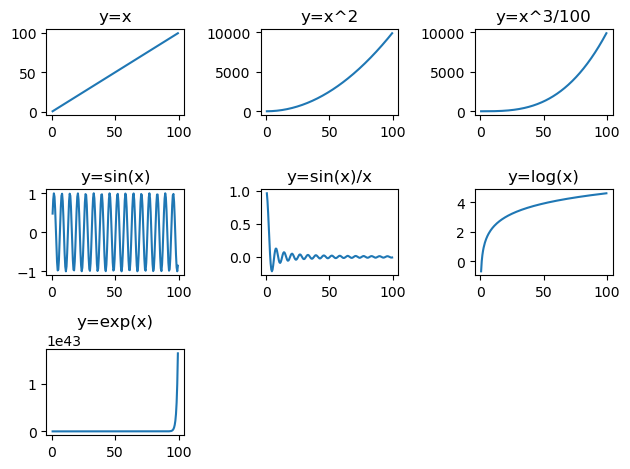

In [3]:
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(0.5,100.0,0.5)
y1=x
y2=x**2
y3=(x**3)/100
y4=np.sin(x)
y5=np.sin(x)/x
y6=np.log(x)
y7=np.exp(x)
plt.subplot(3, 3, 1)
plt.plot(x, y1, label='y=x')
plt.title('y=x')
plt.subplot(3, 3, 2)
plt.plot(x, y2, label='y=x^2')
plt.title('y=x^2')
plt.subplot(3, 3, 3)
plt.plot(x, y3, label='y=x^3/100')
plt.title('y=x^3/100')
plt.subplot(3, 3, 4)
plt.plot(x, y4, label='y=sin(x)')
plt.title('y=sin(x)')
plt.subplot(3, 3, 5)
plt.plot(x, y5, label='y=sin(x)/x')
plt.title('y=sin(x)/x')
plt.subplot(3, 3, 6)
plt.plot(x, y6, label='y=log(x)')
plt.title('y=log(x)')
plt.subplot(3, 3, 7)
plt.plot(x, y7, label='y=exp(x)')
plt.title('y=exp(x)')
plt.tight_layout()
plt.show()

Q11: Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [40]:
arr=np.random.uniform(1,2,100)
array=np.reshape(arr,(20,5))
import pandas as pd
col=["a","b","c","d","e"]
df=pd.DataFrame(array,columns=col)
sd=df.std()
max_sd=sd.idxmax()
print(max_sd)
mean=df.mean(axis=1)
min_mean=mean.idxmin()
print(min_mean)

a
18


Q12: Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [44]:
df["f"]=df.sum(axis=1)
df["g"]=np.where(df["f"]<8,"LT8","GT8")
sd_LT8=df[df["g"]=="LT8"]["f"].std()
sd_GT8=df[df["g"]=="GT8"]["f"].std()
print("standard deviation of column f where value of g is'LT8' is",sd_LT8)
print("standard deviation of column f where value of g is'GT8' is",sd_GT8) 

standard deviation of column f where value of g is'LT8' is 0.5591595510383169
standard deviation of column f where value of g is'GT8' is 0.1776101222271561


Q13:Write a small piece of code to explain broadcasting in numpy.



In [71]:
import numpy as np
ar=np.random.normal(0,2,9)
ar1=ar.reshape((3,3))
print(ar1)
mean=ar1.mean(axis=1)
mean=mean.reshape((3,1))
print(mean)
narr=ar1-mean
print(narr)

[[-0.54495936  1.70478725  1.29555917]
 [-0.5318611  -2.81165789  0.94248664]
 [ 2.26965539  3.18223934  0.05376035]]
[[ 0.81846235]
 [-0.80034412]
 [ 1.83521836]]
[[-1.36342171  0.88632489  0.47709682]
 [ 0.26848302 -2.01131378  1.74283076]
 [ 0.43443703  1.34702098 -1.78145801]]


in this code we have use the concept of broadcastinf in numpy. we generate a 3*3 matrix and then calculate the mean along its rows. then we subtract its mean from the respective row. here that one column of mean broadcast over all other columns in a matrix, as it subtract from each enteries in a row.

Q13: Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [87]:
def fun(arr):
    if len(arr)==0:
        return "enter a valid array"
    else:
        i=0
        min=arr[0]
        for j in range(len(arr)):
            if min>arr[j]:
                min=arr[j]
                i=j
        return i
ar=[23,46,654,45,2,7,863,36,78]
min=fun(ar)
print("solution using function",min)
print("solution using numpy",np.argmin(ar))

solution using function 4
solution using numpy 4
